# 1. Data preprocessing

This data mining technique is used to transform raw data in efficient format. 
<br> It consits of:
* Data cleaning
* Data Transformation
* Data Reduction

The necessary libraries were imported: **numpy**, **pandas** and **seaborn**. <br>


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import sys
sys.path.append('../')

**MissForest** is the class imported from **missingpy** library to impute missing values using Random Forests.<br>
More information about this library can be accessed with this link [https://github.com/epsilon-machine/missingpy](https://github.com/epsilon-machine/missingpy).

In [42]:
from missingpy import MissForest

Data (_'diabets.txt'_ file ) provided by the UCI Machine Learning Repository was imported using **read_csv** pandas method.

In [43]:
dataset = pd.read_csv('../code_files/data/diabetes.txt')

Dataset consists of 8 independent variables and one target value named <font color = 'green'> __Outcome__ <font color = 'black'>. There are 768 entries without any blanks.<br>
Majority of columns have integer datatype. Two variables: __BMI__ and __DiabetesPedigreeFunction__ have float datatype.

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
dataset.shape

(768, 9)

In dataset we have the following features available: <br>

* **Pregnancies** - number of times pregnant <br><br>
* **Glucose** - plasma glucose concentration a 2 hours in an oral glucose tolerance test <br> <br>
* **Blood Pressure** - diastolic blood pressure (mm Hg) <br><br>
* **SkinThickness** - triceps skin fold thickness (mm) <br><br>
* **Insulin** - 2-Hour serum insulin (mu U/ml) <br><br>
* **BMI** - body mass index (weight in kg/(height in m)^2) <br><br>
* **DiabetesPedigreeFunction** - diabetes pedigree function <br><br>
* **Age** - age (years) <br><br>
* **Outcome** - class variable (0 or 1) <br><br>

In [46]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [47]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 1.1 Data cleaning
### Missing data
Checking results of  **isnull()**  function it seems that dataset has no _null_ values. As it can be noticed there are some _zero_ values in dataset. In case of some features this value can be realistic (e.g. _Pregnancies_), but it can be an error in dataset or result of replacing _'NaN'_ values.

In [48]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
col = dataset.columns[:-1]

To examine how many of _zero_ values are available in raw data the below sums are displayed.

In [50]:
(dataset[col] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

* _Insulin_ column has the largest number of _zero_ values. It is very rarely possible to have 0 insulin, but there is a total of 374 counts. <br><br>
* _Skin thickness_ should be greater than 10 mm, so it seems that there are 227 errors in data entered as 0 value. <br><br>
* There are 35 _zero_ values in _BloodPressure_ column. It is obvious that any living person could have blood pressure equal to 0. <br><br>
* It is rather impossible to have _BMI_ close to zero. There are 11 values which should be treated as mistake. <br><br> 
* As it was presented above there are 5 _zero_ values in _Glucose_ column, but plasma glucose levels whould not be as low as zero.<br> 

There are some methods to deal with missing values. They can be removed as enire row but  we can loose valuable information. The second way is to input average/mean values instead of missing values. In some cases it can be helpful but it can send a wrong signal to the model. Features with missing values can also be removed from the model but it is not the best idea and it might have negative impact on the model. <br><br>

It seems that the best solution in this case is to use some built-in methods to deal with missing values. There are some models which can be used but they require 'NaN' values. It is necessary to replace _zero_ values in *"Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"* columns.

In [51]:
dataset_orginal = dataset.copy()
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in columns_to_fill:
   dataset[c].replace(0.0, np.nan ,inplace=True)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [52]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

*missingpy* library supports the following algorithms: <br>
* __k-Nearest Neighbours__ imputation - the _KNNImputer_ class provides imputation for completing missing values using the _k-Nearest Neighbors_ approach. This algorithm required to have normalized data, because it is based on euclidean distance.
* __MissForest__ imputes missing values using _Random Forests_ in an iterative fashion. It does not require normalization, but all categorical data should be one-hot-encoded.<br><br>

For this dataset __MissForest__ method was used.

In [53]:
imputer = MissForest()
dataset_to_convert = dataset.to_numpy()
dataset_without_nan = imputer.fit_transform(dataset_to_convert)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [54]:
df = pd.DataFrame(dataset_without_nan, columns = dataset.columns)

Dataset without missing values was saved as _df_.

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00,201.62,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00,57.02,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,19.03,233.41,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.288,33.0,1.0


In [56]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Feature distribution
Data distribution of features was presented below. There are two sets of histogram charts for orginal data and charts created based on newly created _df_ dataset.

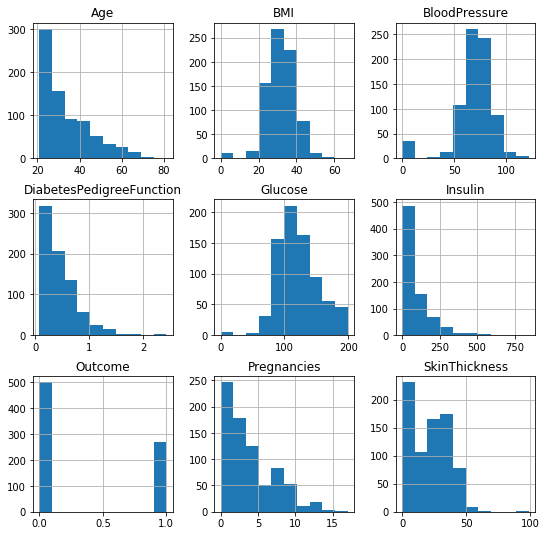

In [57]:
dataset_orginal.hist(figsize=(9,9));
plt.savefig("Histograms_orginal.jpg")

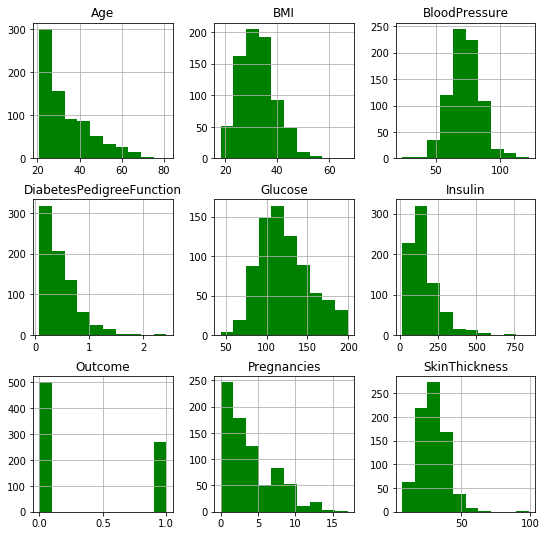

In [58]:
df.hist(figsize=(9,9), color = 'green');
plt.savefig("Histograms_updated.jpg")

### Outliers

Analyzing histograms it can be noticed that there are some outliers for some features. The better way to see outliers is to prepare _boxplot_ for each feature.<br>
It seems that there is no outlier for _Glucose_. The rest of features have outliers.

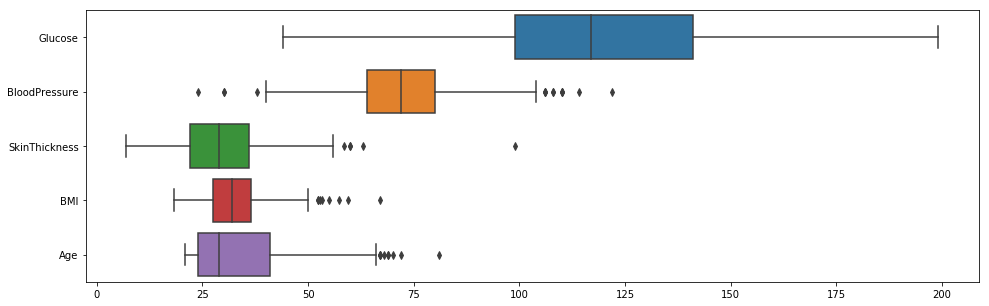

In [59]:
plt.figure(figsize = (16,5))
sns.boxplot(data = df.iloc[:,[1,2,3,5,7]], orient = "h");
plt.savefig("Boxplot1.jpg")

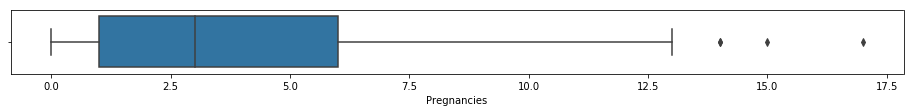

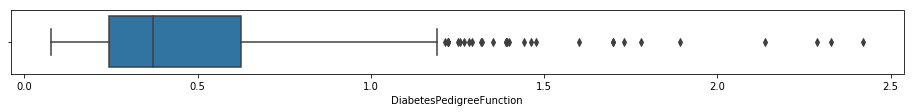

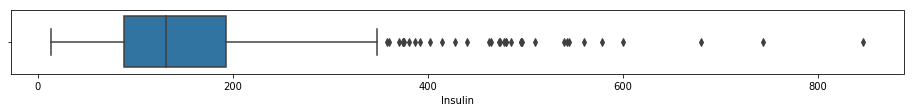

In [74]:
plt.figure(figsize = (16,4))
plt.subplot(311)
sns.boxplot(x = df["Pregnancies"], orient = "h" );
plt.figure(figsize = (16,4))
plt.subplot(312)
sns.boxplot(x = df["DiabetesPedigreeFunction"], orient = "h");
plt.figure(figsize = (16,4))
plt.subplot(313)
sns.boxplot(x = df["Insulin"], orient = "h");



### Data exploration

The below code was created to find and visualize correlation of every pair of features and independent _'Outcome'_ variable.
Tere are two _heatmaps_ for orginal data and data with missing values replaced by results of *MissForest* method.



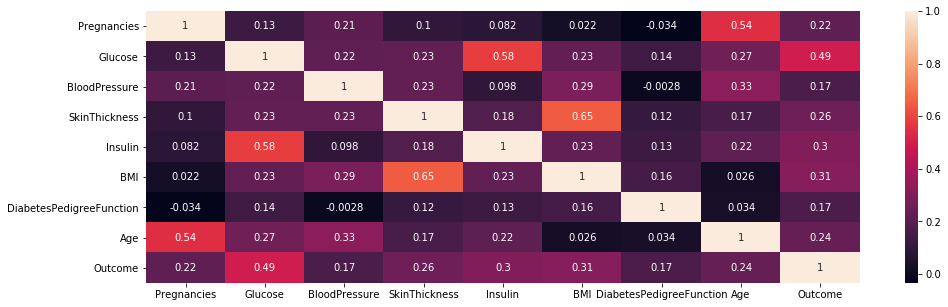

In [76]:
corrMatrix = dataset.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True);
plt.show()

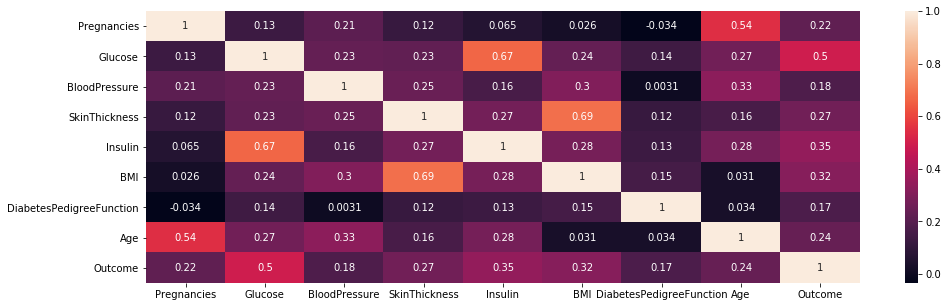

In [77]:
corrMatrix2 = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix2, annot=True);
plt.show()

To see how many cases in dataset was marked as _'Diabetes'_ countplot() method from seaborn library was used.

In [86]:
df.groupby('Outcome').size()

Outcome
0.0    500
1.0    268
dtype: int64

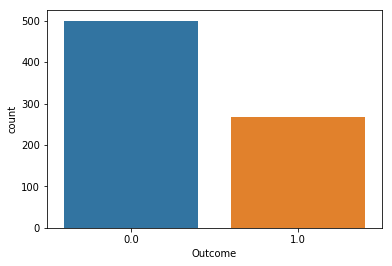

In [78]:
sns.countplot((df["Outcome"]));
plt.savefig("Unbalanced.jpg")

In this case there are two issues outliers and unbalanced dataset. Highlights how to proceed in such situation can be found in <br>[_Artificial Intelligence in Medicine_ journal.](https://www.sciencedirect.com/science/article/pii/S093336571830681X#bib0040)

In [79]:
df.to_csv (r'C:\Users\zuzan\Documents\Diabetes\Diabetes\code_files\data\export_dataframe.csv', index = False, header=True)